<a href="https://colab.research.google.com/github/Husain-Vora/Deep-Learning-and-AI/blob/main/ANN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import tensorflow as tf
print(tf.__version__)

2.18.0


In [29]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print(f"x_train.shape : {x_train.shape}")

x_train.shape : (60000, 28, 28)


In [30]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [31]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [32]:
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.8632 - loss: 0.4746 - val_accuracy: 0.9592 - val_loss: 0.1363
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step - accuracy: 0.9554 - loss: 0.1519 - val_accuracy: 0.9674 - val_loss: 0.1059
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9679 - loss: 0.1085 - val_accuracy: 0.9734 - val_loss: 0.0832
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9748 - loss: 0.0818 - val_accuracy: 0.9749 - val_loss: 0.0813
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9777 - loss: 0.0709 - val_accuracy: 0.9769 - val_loss: 0.0716
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9797 - loss: 0.0641 - val_accuracy: 0.9748 - val_loss: 0.0764
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9827 - loss: 0.0555 - val_accuracy: 0.9760 - val_loss: 0.0810
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9837 - loss: 0.05

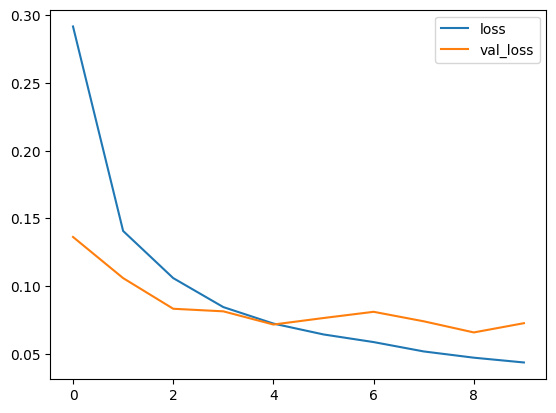

In [33]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss');
plt.plot(r.history['val_loss'], label='val_loss');
plt.legend();

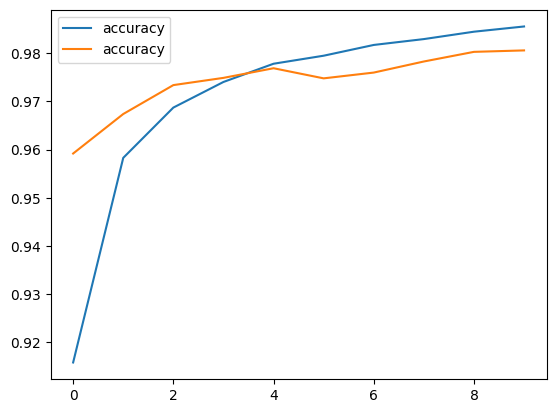

In [34]:
plt.plot(r.history['accuracy'], label='accuracy');
plt.plot(r.history['val_accuracy'], label='accuracy');
plt.legend();

In [35]:
print(model.evaluate(x_test, y_test));
#[loss, accuracy]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9765 - loss: 0.0866
[0.0725569799542427, 0.9805999994277954]


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
COnfusion matrix, without normalization
[[ 971    1    0    2    1    2    1    0    1    1]
 [   0 1127    4    0    0    0    2    0    2    0]
 [   4    1 1014    4    2    0    2    3    2    0]
 [   0    0    3  999    0    3    0    1    2    2]
 [   0    0    4    1  967    0    5    0    1    4]
 [   2    0    0   10    0  876    1    0    1    2]
 [   4    3    1    1    3    7  939    0    0    0]
 [   0    6   14    2    1    0    0  998    1    6]
 [   1    1    4    7    4    7    1    4  943    2]
 [   3    4    0    6   11    6    0    5    2  972]]


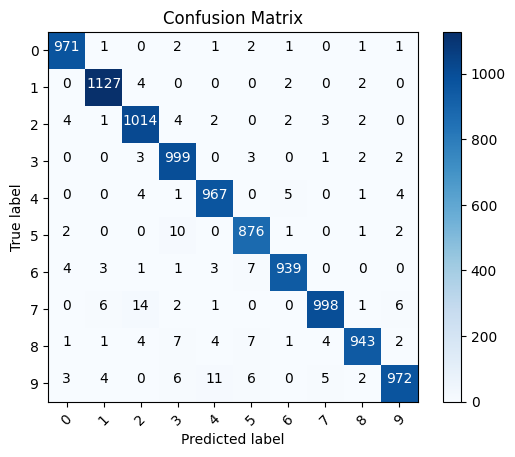

In [36]:
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion Matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """

  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalized confusion matrix")
  else:
    print("COnfusion matrix, without normalization")

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment='center',
             color = 'white' if cm[i, j] > thresh else 'black')

  plt.tight_layout
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

#Do these results make sense?
# It's easy to confuse 9 <--> 4, 9 <--> 7, 2 <--> 7, etc.

Text(0.5, 1.0, 'True label 8 Predicted label 3')

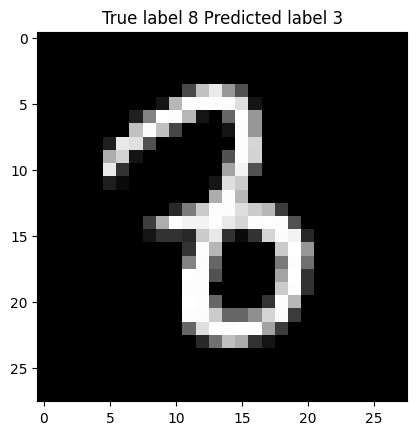

In [53]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label %s Predicted label %s" %(y_test[i], p_test[i]))